# Part 1: Data Source and Contents

# Setting up the Notebook

In [3]:
# Connect to google drive

from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
# Import packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
# Read dataset

data = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

# Investigating the dataset

In [6]:
# View first 10 rows of the dataset

data.head(10)

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   
5           b. 31-40        e. High  c. High         a. = 0       b. Mid   
6            a. 0-30         a. Low   b. Mid         a. = 0       a. Low   
7   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
8   d. 41-50 & 61-70        e. High   b. Mid         c. > 0       b. Mid   
9           b. 31-40        e. High  c. High         c. > 0      c. High   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  
5             d. 14    d. Masters     b. income   d. 36-40 & 56-60  train  0  
6            a. 0-8        a. Low     b. income           e. 40-55  train  0  
7           b. 9-12        b. Mid     b. income           e. 40-55  train  1  
8             d. 14    d. Masters     b. income   c. 31-35 & 61-70  train  1  
9             c. 13  c. Bachelors     b. income           e. 40-55  train  1

In [7]:
# Checking the shape for verification

data.shape

(48842, 11)

In [8]:
# Statistical Info

data.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

# Q.1 Why does it makes sense to discretize columns for this problem?

In [56]:
print("Discretization did not only help simplify the dataset and hence the models that came from it but it is also a good idea to implement when there are continuos variables or trends in the dataset looking at which one can decide to group variables")

Discretization did not only help simplify the dataset and hence the models that came from it but it is also a good idea to implement when there are continuos variables or trends in the dataset looking at which one can decide to group variables


# Q.2 What might be the issues (if any) if we DID NOT discretize the columns

In [57]:
print("Possible risk of overfitting and also unnecessarily long and complex model")

Possible risk of overfitting and also unnecessarily long and complex model


# Part 2: Data Quality Analysis (DQA)

# DQA to find missing values, outliers, NaNs etc.


In [9]:
# Look for missing values

missing_values = data.isna().sum()
missing_values

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [26]:
print("No missing values in dataset")

No missing values in dataset


In [10]:
# Further checking if all columns have same number of values

data.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

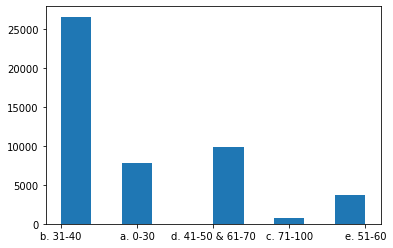

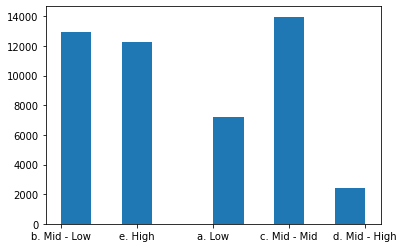

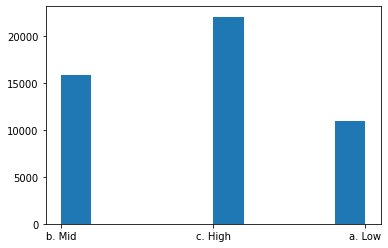

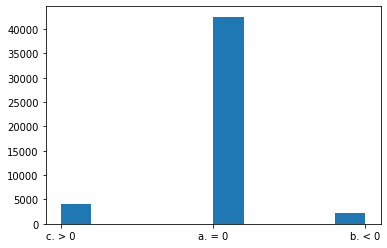

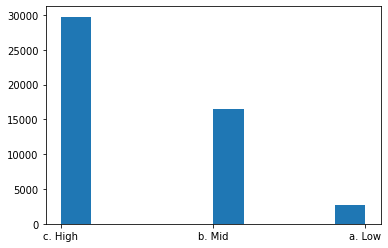

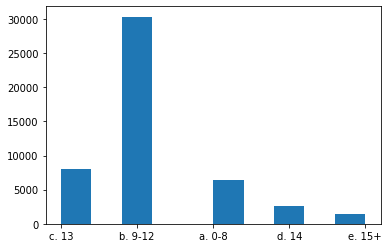

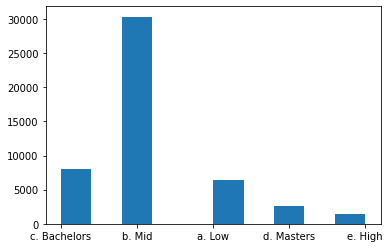

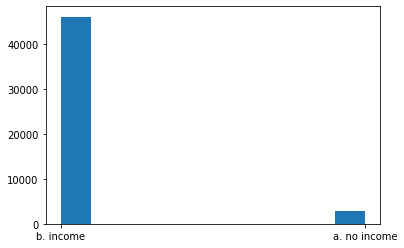

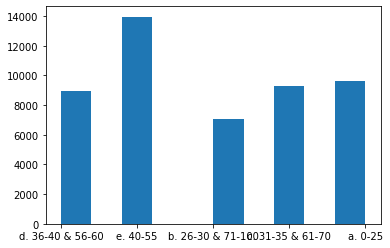

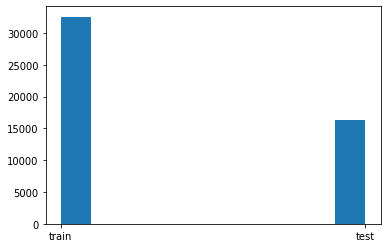

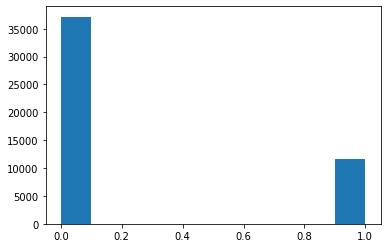

In [11]:
# Use scatter plot matrix to see relationship between each variable
# Also helps detect outliers

for col in data.columns:
  plt.hist(data[col])
  plt.show()

# Display descriptive statistics of each column

In [12]:
# Descriptive Statistics

data.describe(include='all')

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
count               48842          48842    48842          48842        48842   
unique                  5              5        3              3            3   
top              b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
freq                26639          13971    22047          42525        29737   
mean                  NaN            NaN      NaN            NaN          NaN   
std                   NaN            NaN      NaN            NaN          NaN   
min                   NaN            NaN      NaN            NaN          NaN   
25%                   NaN            NaN      NaN            NaN          NaN   
50%                   NaN            NaN      NaN            NaN          NaN   
75%                   NaN            NaN      NaN            NaN          NaN   
max                   NaN            NaN      NaN            NaN          NaN   

       education_num_bin education_bin workclass_bin   age_bin   flag  \
count              48842         48842         48842     48842  48842   
unique                 5             5             2         5      2   
top              b. 9-12        b. Mid     b. income  e. 40-55  train   
freq               30324         30324         46012     13963  32561   
mean                 NaN           NaN           NaN       NaN    NaN   
std                  NaN           NaN           NaN       NaN    NaN   
min                  NaN           NaN           NaN       NaN    NaN   
25%                  NaN           NaN           NaN       NaN    NaN   
50%                  NaN           NaN           NaN       NaN    NaN   
75%                  NaN           NaN           NaN       NaN    NaN   
max                  NaN           NaN           NaN       NaN    NaN   

                   y  
count   48842.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.239282  
std         0.426649  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

# Part 3: Build Decision Tree Classifier Models

# Split into training and testing datasets

In [13]:
# Import Package to build Decision Tree Model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing

In [14]:
# Create training dataset 

train_set = data[data['flag'] == 'train']
train_set.head(10)

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   
5           b. 31-40        e. High  c. High         a. = 0       b. Mid   
6            a. 0-30         a. Low   b. Mid         a. = 0       a. Low   
7   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
8   d. 41-50 & 61-70        e. High   b. Mid         c. > 0       b. Mid   
9           b. 31-40        e. High  c. High         c. > 0      c. High   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  
5             d. 14    d. Masters     b. income   d. 36-40 & 56-60  train  0  
6            a. 0-8        a. Low     b. income           e. 40-55  train  0  
7           b. 9-12        b. Mid     b. income           e. 40-55  train  1  
8             d. 14    d. Masters     b. income   c. 31-35 & 61-70  train  1  
9             c. 13  c. Bachelors     b. income           e. 40-55  train  1

In [15]:
# Create testing dataset 

test_set = data[data['flag'] == 'test']
test_set.head(10)

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
32561           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
32562   d. 41-50 & 61-70   b. Mid - Low  c. High         a. = 0      c. High   
32563           b. 31-40  d. Mid - High  c. High         a. = 0      c. High   
32564           b. 31-40   b. Mid - Low  c. High         c. > 0       b. Mid   
32565            a. 0-30   b. Mid - Low   a. Low         a. = 0       b. Mid   
32566            a. 0-30         a. Low   b. Mid         a. = 0      c. High   
32567           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
32568           b. 31-40        e. High  c. High         c. > 0      c. High   
32569           b. 31-40         a. Low   a. Low         a. = 0       b. Mid   
32570            a. 0-30   c. Mid - Mid  c. High         a. = 0      c. High   

      education_num_bin education_bin workclass_bin            age_bin  flag  \
32561            a. 0-8        a. Low     b. income            a. 0-25  test   
32562           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  test   
32563           b. 9-12        b. Mid     b. income  b. 26-30 & 71-100  test   
32564           b. 9-12        b. Mid     b. income           e. 40-55  test   
32565           b. 9-12        b. Mid  a. no income            a. 0-25  test   
32566            a. 0-8        a. Low     b. income   c. 31-35 & 61-70  test   
32567           b. 9-12        b. Mid  a. no income  b. 26-30 & 71-100  test   
32568            e. 15+       e. High     b. income   c. 31-35 & 61-70  test   
32569           b. 9-12        b. Mid     b. income            a. 0-25  test   
32570            a. 0-8        a. Low     b. income           e. 40-55  test   

       y  
32561  0  
32562  0  
32563  1  
32564  1  
32565  0  
32566  0  
32567  0  
32568  1  
32569  0  
32570  0

In [16]:
# Select independant and dependant variables from the datasets 

X_train = pd.get_dummies(train_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_train=train_set['y']
X_test=pd.get_dummies(test_set[['age_bin', 'capital_gl_bin', 'education_bin','hours_per_week_bin', 'msr_bin', 'occupation_bin', 'race_sex_bin','education_num_bin','workclass_bin']],drop_first=True)
y_test=test_set['y']

# Encode

In [17]:
# Create Ordinal Encoder to transform categorical variables to numerical variables 

oe = preprocessing.OrdinalEncoder()

In [18]:
# Encode train dataset

oe.fit(X_train)
X_train= oe.transform(X_train)
X_train= pd.DataFrame(X_train)

X_train.head(5)

0    1    2    3    4    5    6    7    8    9   ...   17   18   19   20  \
0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   

    21   22   23   24   25   26  
0  1.0  0.0  1.0  0.0  0.0  1.0  
1  1.0  0.0  1.0  0.0  0.0  1.0  
2  1.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  
4  0.0  0.0  1.0  0.0  0.0  1.0  

[5 rows x 27 columns]

In [19]:
# Encode test dataset 
oe.fit(X_test)
X_test= oe.transform(X_test)
X_test= pd.DataFrame(X_test)

X_test.head(5)

0    1    2    3    4    5    6    7    8    9   ...   17   18   19   20  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
1  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0  0.0  0.0   
3  0.0  0.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   

    21   22   23   24   25   26  
0  0.0  0.0  0.0  0.0  0.0  1.0  
1  1.0  1.0  0.0  0.0  0.0  1.0  
2  1.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  1.0  0.0  0.0  0.0  1.0  
4  0.0  1.0  0.0  0.0  0.0  0.0  

[5 rows x 27 columns]

# Build Decision Tree

In [20]:
dtree = DecisionTreeClassifier(max_depth = 10, random_state = 101, 
                             max_features = None, min_samples_leaf = 15)
# Fit the data 
dtree.fit(X_train,y_train)

# Predict 
y_pred=dtree.predict(X_test)

# Part 4: Evaluate Decision Tree Performance

# Confusion Matrix (TP, TN, FP, FN ... etc.)

In [21]:
# Confusion matrix shows TP, FP, TN and FN

import sklearn.metrics as metrics 
data_confusion = confusion_matrix(y_test,y_pred)
print(data_confusion)

[[11521   914]
 [ 1653  2193]]


# Accuracy, Precision, Recall, F1 Score

In [22]:
# Model accuracy

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:",accuracy)

Model Accuracy: 0.8423315521159634


In [23]:
print("Model is very well trained with a high accuracy measure")

Model is very well trained with a high accuracy measure


In [24]:
# Print classification_report to assess model precision, recall and f1-score 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



# Part 5: Tune Decision Tree Performance

# Parameter 1- Gini Impurity

In [27]:
# Tree 1 

dtree_1 = DecisionTreeClassifier(min_samples_split=10,max_depth=10, min_samples_leaf=15)
dtree_1.fit(X_train,y_train)
y_pred_1 = dtree_1.predict(X_test)

accuracy_1 = accuracy_score(y_test, y_pred_1)
print('TREE 1')
print("Model Accuracy:",accuracy_1)
print(classification_report(y_test, y_pred_1))

TREE 1
Model Accuracy: 0.8423315521159634
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [28]:
# Tree 2 

dtree_2 = DecisionTreeClassifier(min_samples_split= 5,max_depth = 5, min_samples_leaf=10)
dtree_2.fit(X_train,y_train)
y_pred_2 = dtree_2.predict(X_test)

accuracy_2 = accuracy_score(y_test, y_pred_2)
print('TREE 2')
print("Model Accuracy:",accuracy_1)
print(classification_report(y_test, y_pred_2))

TREE 2
Model Accuracy: 0.8423315521159634
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     12435
           1       0.70      0.48      0.57      3846

    accuracy                           0.83     16281
   macro avg       0.78      0.71      0.73     16281
weighted avg       0.82      0.83      0.82     16281



In [30]:
# Tree 3

dtree_3 = DecisionTreeClassifier(min_samples_split= 2,max_depth = 2, min_samples_leaf=5)
dtree_3.fit(X_train,y_train)
y_pred_3 = dtree_3.predict(X_test)

accuracy_3 = accuracy_score(y_test, y_pred_3)
print('TREE 3')
print("Model Accuracy:",accuracy_3)
print(classification_report(y_test, y_pred_3))

TREE 3
Model Accuracy: 0.8165960321847552
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.70      0.40      0.51      3846

    accuracy                           0.82     16281
   macro avg       0.77      0.67      0.70     16281
weighted avg       0.80      0.82      0.80     16281



In [31]:
# Tree 4

dtree_4 = DecisionTreeClassifier(min_samples_split= 7,max_depth = 7, min_samples_leaf=10)
dtree_4.fit(X_train,y_train)
y_pred_4 = dtree_4.predict(X_test)

accuracy_4 = accuracy_score(y_test, y_pred_4)
print('TREE 4')
print("Model Accuracy:",accuracy_4)
print(classification_report(y_test, y_pred_4))

TREE 4
Model Accuracy: 0.8361894232540998
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.69      0.55      0.61      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.75     16281
weighted avg       0.83      0.84      0.83     16281



# Parameter 2- Entropy

In [32]:
# Tree 5 
dtree_5 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=10, min_samples_leaf=15)
dtree_5.fit(X_train,y_train)
y_pred_5 = dtree_5.predict(X_test)

accuracy_5 = accuracy_score(y_test, y_pred_5)
print('TREE 5')
print("Model Accuracy:",accuracy_5)
print(classification_report(y_test, y_pred_5))

TREE 5
Model Accuracy: 0.8424543946932007
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.83      0.84      0.84     16281



In [33]:
# Tree 6 
dtree_6 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=7, min_samples_leaf=15)
dtree_6.fit(X_train,y_train)
y_pred_6 = dtree_6.predict(X_test)

accuracy_6 = accuracy_score(y_test, y_pred_6)
print('TREE 6')
print("Model Accuracy:",accuracy_6)
print(classification_report(y_test, y_pred_6))

TREE 6
Model Accuracy: 0.8373564277378539
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.56      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [34]:
# Tree 7 
dtree_7 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=7, min_samples_leaf=20)
dtree_7.fit(X_train,y_train)
y_pred_7 = dtree_7.predict(X_test)

accuracy_7 = accuracy_score(y_test, y_pred_7)
print('TREE 7')
print("Model Accuracy:",accuracy_7)
print(classification_report(y_test, y_pred_7))

TREE 7
Model Accuracy: 0.8368036361402862
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     12435
           1       0.69      0.55      0.62      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.74      0.76     16281
weighted avg       0.83      0.84      0.83     16281



In [35]:
# Tree 8 
dtree_8 = DecisionTreeClassifier(criterion='entropy', min_samples_split=2,max_depth=10, min_samples_leaf=20)
dtree_8.fit(X_train,y_train)
y_pred_8 = dtree_8.predict(X_test)

accuracy_8 = accuracy_score(y_test, y_pred_8)
print('TREE 8')
print("Model Accuracy:",accuracy_8)
print(classification_report(y_test, y_pred_8))

TREE 8
Model Accuracy: 0.8430071862907684
              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



# Part 6: Visualize Your Best Decision Tree using GraphViz

# Install and import packages

In [36]:
# Install necessary packages

#!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.928612 to fit



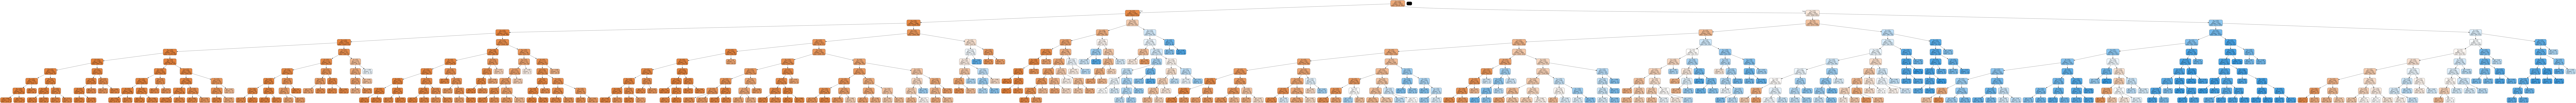

<Figure size 3600x2880 with 0 Axes>

In [41]:
# Visualize using dot graph
dot_data = StringIO()
plt.figure(figsize=(50,40))

# Export the decision tree to a dot file by export_graphviz function
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

# Part 7: Conclusion

# Q.4 How long was your total run time to train the best model?

In [44]:
import timeit
code_to_test = """
a = range(100000)
b = []
for i in a:
    b.append(i*2)
"""
elapsed_time = timeit.timeit(code_to_test, number=100)/100
print("It took", elapsed_time, "to train the best model")

It took 0.009318093639999461 to train the best model


# Q.5 Did you find the BEST TREE?

In [48]:
print("The model with the highest accuracy was Tree 8, with accuracy of 84%")

The model with the highest accuracy was Tree 8, with accuracy of 84%


# Q.6 Write your observations from the visualization of the best tree

In [49]:
print("The best tree has criterion='entropy', min_samples_split=2, max_depth=10 and min_samples_leaf=20")

The best tree has criterion='entropy', min_samples_split=2, max_depth=10 and min_samples_leaf=20


# Q.7 Will this Tree “overfit”?

In [50]:
print("Yes this tree is overfitting")

Yes this tree is overfitting


# Part 8: Prediction using your “trained” Decision Tree Model

# Create new dataframe

In [51]:
df = pd.DataFrame({'age_bin_b. 26-30 & 71-100':0,'age_bin_c. 31-35 & 61-70':0,'age_bin_d. 36-40 & 56-60':1,'age_bin_e. 40-55':0,'capital_gl_bin_b. < 0':0,'capital_gl_bin_c. > 0':1,'education_bin_b. Mid':0,'education_bin_c. Bachelors':0,'education_bin_d. Masters':0,'education_bin_e. High':1,'hours_per_week_bin_b. 31-40':0,'hours_per_week_bin_c. 71-100':0,'hours_per_week_bin_d. 41-50 & 61-70':1,'hours_per_week_bin_e. 51-60':0,'msr_bin_b. Mid':0,'msr_bin_c. High':1,'occupation_bin_b. Mid - Low':1,'occupation_bin_c. Mid - Mid':0,'occupation_bin_d. Mid - High':0,'occupation_bin_e. High':0,'race_sex_bin_b. Mid':1,'race_sex_bin_c. High':0,'education_num_bin_b. 9-12':1,'education_num_bin_c. 13':0,'education_num_bin_d. 14':0,'education_num_bin_e. 15+':0,'workclass_bin_b. income':1},index=[0])
df

age_bin_b. 26-30 & 71-100  age_bin_c. 31-35 & 61-70  \
0                          0                         0   

   age_bin_d. 36-40 & 56-60  age_bin_e. 40-55  capital_gl_bin_b. < 0  \
0                         1                 0                      0   

   capital_gl_bin_c. > 0  education_bin_b. Mid  education_bin_c. Bachelors  \
0                      1                     0                           0   

   education_bin_d. Masters  education_bin_e. High  ...  \
0                         0                      1  ...   

   occupation_bin_c. Mid - Mid  occupation_bin_d. Mid - High  \
0                            0                             0   

   occupation_bin_e. High  race_sex_bin_b. Mid  race_sex_bin_c. High  \
0                       0                    1                     0   

   education_num_bin_b. 9-12  education_num_bin_c. 13  \
0                          1                        0   

   education_num_bin_d. 14  education_num_bin_e. 15+  workclass_bin_b. income  
0                        0                         0                        1  

[1 rows x 27 columns]

# Run Decision Tree algorithm using new dataframe

In [53]:
dtree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split= 2,max_depth= 10, min_samples_leaf=20)
dtree.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=20)

# Q.8 What is the probability that your prediction for this person is correct?

In [54]:
x_prob=[[0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,1]]
y_pred=dtree.predict(x_prob)
prob=dtree.predict_proba(x_prob)

print('The Confidence of the prediciton is ', prob[0][y_pred])

The Confidence of the prediciton is  [0.71428571]
